In [111]:
from __future__ import absolute_import, print_function, unicode_literals
import sys
import os
import repackage
repackage.up(stepup=2)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import analysis2 as a2
from flutype.models import Spot
import django
django.setup()
from importlib import reload
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn import preprocessing

## Load Elisa Data

In [112]:
reload(a2)
studies = ["elisa_2018_03_28"]
analyte_batches = ["A/Aichi/2/68(H3N2)-4-5",
                  "A/Aichi/2/68(H3N2)-4-10",
                  "A/Aichi/2/68(H3N2)-4-20",
                  'A/Brisbane/10/2007(H3N2)-10',
                  'A/Brisbane/10/2007(H3N2)-20',
                  'A/Brisbane/10/2007(H3N2)-5',
                  'A/Brisbane/59/2007(H1N1)-10',
                  'A/Brisbane/59/2007(H1N1)-20',
                  'A/Brisbane/59/2007(H1N1)-5',
                  'A/California/07/2009(H1N1)-3-10',
                  'A/California/07/2009(H1N1)-3-20',
                  'A/California/07/2009(H1N1)-3-5',
                  'A/Hong Kong/4801/2014(H3N2)-10',
                  'A/Hong Kong/4801/2014(H3N2)-20',
                  'A/Hong Kong/4801/2014(H3N2)-5',
                  'A/Panama/2007/1999(H3N2)-3-10',
                 'A/Panama/2007/1999(H3N2)-3-20',
                 'A/Panama/2007/1999(H3N2)-3-5',
                   "Buffer001",
                  ]
spots_dj = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj = spots_dj.filter(raw_spot__lig_mob_batch__sid__in=analyte_batches)
data_elisa = a2.Data(spots_dj=spots_dj)

In [116]:
data_elisa.spots_pd

,Ligand Batch,Ligand Batch Concentration,Ligand,Analyte Batch,Analyte Batch Concentraion,Analyte,Intensity,Std,Circle Quality,Collection,Study,Row,Column,Collection Type,Replica
0,Empty,NaN,NaN,Buffer001,NaN,NaN,0.039,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,12,raw,0
1,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-5,5.0,A/Aichi/2/68(H3N2)-X31,0.117,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,9,raw,0
2,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-5,5.0,A/Aichi/2/68(H3N2)-X31,0.144,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,8,raw,1
3,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-5,5.0,A/Aichi/2/68(H3N2)-X31,0.139,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,7,raw,2
4,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-10,10.0,A/Aichi/2/68(H3N2)-X31,0.139,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,6,raw,0
5,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-10,10.0,A/Aichi/2/68(H3N2)-X31,0.805,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,5,raw,1
6,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-10,10.0,A/Aichi/2/68(H3N2)-X31,0.124,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,4,raw,2
7,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-20,20.0,A/Aichi/2/68(H3N2)-X31,0.129,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,3,raw,0
8,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-20,20.0,A/Aichi/2/68(H3N2)-X31,0.123,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,2,raw,1
9,Empty,NaN,NaN,A/Aichi/2/68(H3N2)-4-20,20.0,A/Aichi/2/68(H3N2)-X31,0.116,NaN,NaN,2018_03_21-achi-1,elisa_2018_03_28,8,1,raw,2


## Load Reference  Data

In [117]:
studies = ["microarray_2018_03_21"]
spots_dj_reference = Spot.objects.filter(raw_spot__raw_spot_collection__studies__sid__in=studies)
spots_dj_reference = spots_dj_reference.filter(spot_collection__sid = "quant1")
data_reference = a2.Data(spots_dj=spots_dj_reference).outlier_filtering().sample_on_collection(20).clean()

## Rank Peptides by Relafance in Reference Data

In [118]:
frames = []
for n, d in data_reference.spots_pd.groupby("Ligand Batch"):
    
    tukey = pairwise_tukeyhsd(endog=d["Intensity"], groups=d["Analyte Batch"],alpha=0.01)
    frames.append(pd.Series({"Ligand Batch":n,"Distinct Groups":np.count_nonzero(tukey.reject)}))
pepsig = pd.concat(frames, axis=1).transpose().sort_values(by="Distinct Groups", ascending=False)
peptides_ranking = pd.Series(pepsig["Distinct Groups"].values,index=pepsig["Ligand Batch"])  

In [119]:
peptides_ranking.to_clipboard()

Check  relevance of peptides in elisa study by relevance in reference data set 

In [120]:
print("From {} petides the follwing petides ranked:".format(len(peptides_ranking)))

for ligand in  data_elisa.spots_pd["Ligand Batch"].unique():
    
    if "0.3" in str(ligand):
        peptide = str(ligand)[:-4]
        try:
            print("{}:{}".format(peptide,peptides_ranking.index.get_loc(peptide)))
        except KeyError:
            print("{} is not in reference data set".format(peptide))


From 86 petides the follwing petides ranked:
P135:70
P052:58
P130:57
P124:26
P116:30
P079 is not in reference data set


Selected Peptide have rather low relevance. This is bad.

## Check concentration dependence in elisa data set

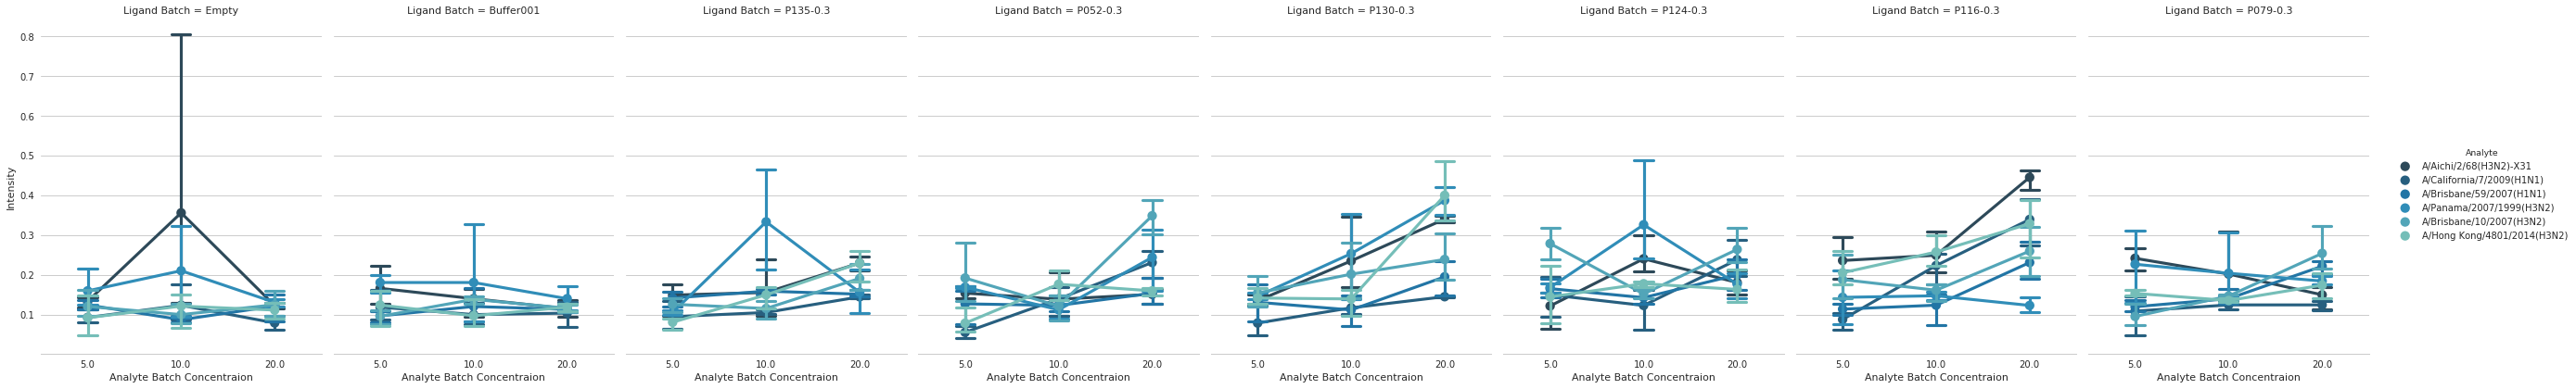

In [121]:
sns.set(style="whitegrid")
g = sns.factorplot(x="Analyte Batch Concentraion", y="Intensity", hue="Analyte", col="Ligand Batch", data=data_elisa.spots_pd,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

 - Concentration of Analyte Batch has no dependece on the Intensity for Ligand Batch == Buffer. This is good
 - qualitativ: correct relation between Concentration and Intensity


Question 1: How to normalize? 

 ## Correlation Plots

In [122]:
cmap = matplotlib.cm.get_cmap('Accent')

In [123]:
colors =  cmap(np.linspace(0,1,num=6))
color_list = []
for color in colors:
    for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

Correlation of Peptides (check if viruses cluster in any corplot)
-  x -> Buffer 
- d -> 5 Concentration
- o -> 10 Concentration
- s -> 20 Concentration

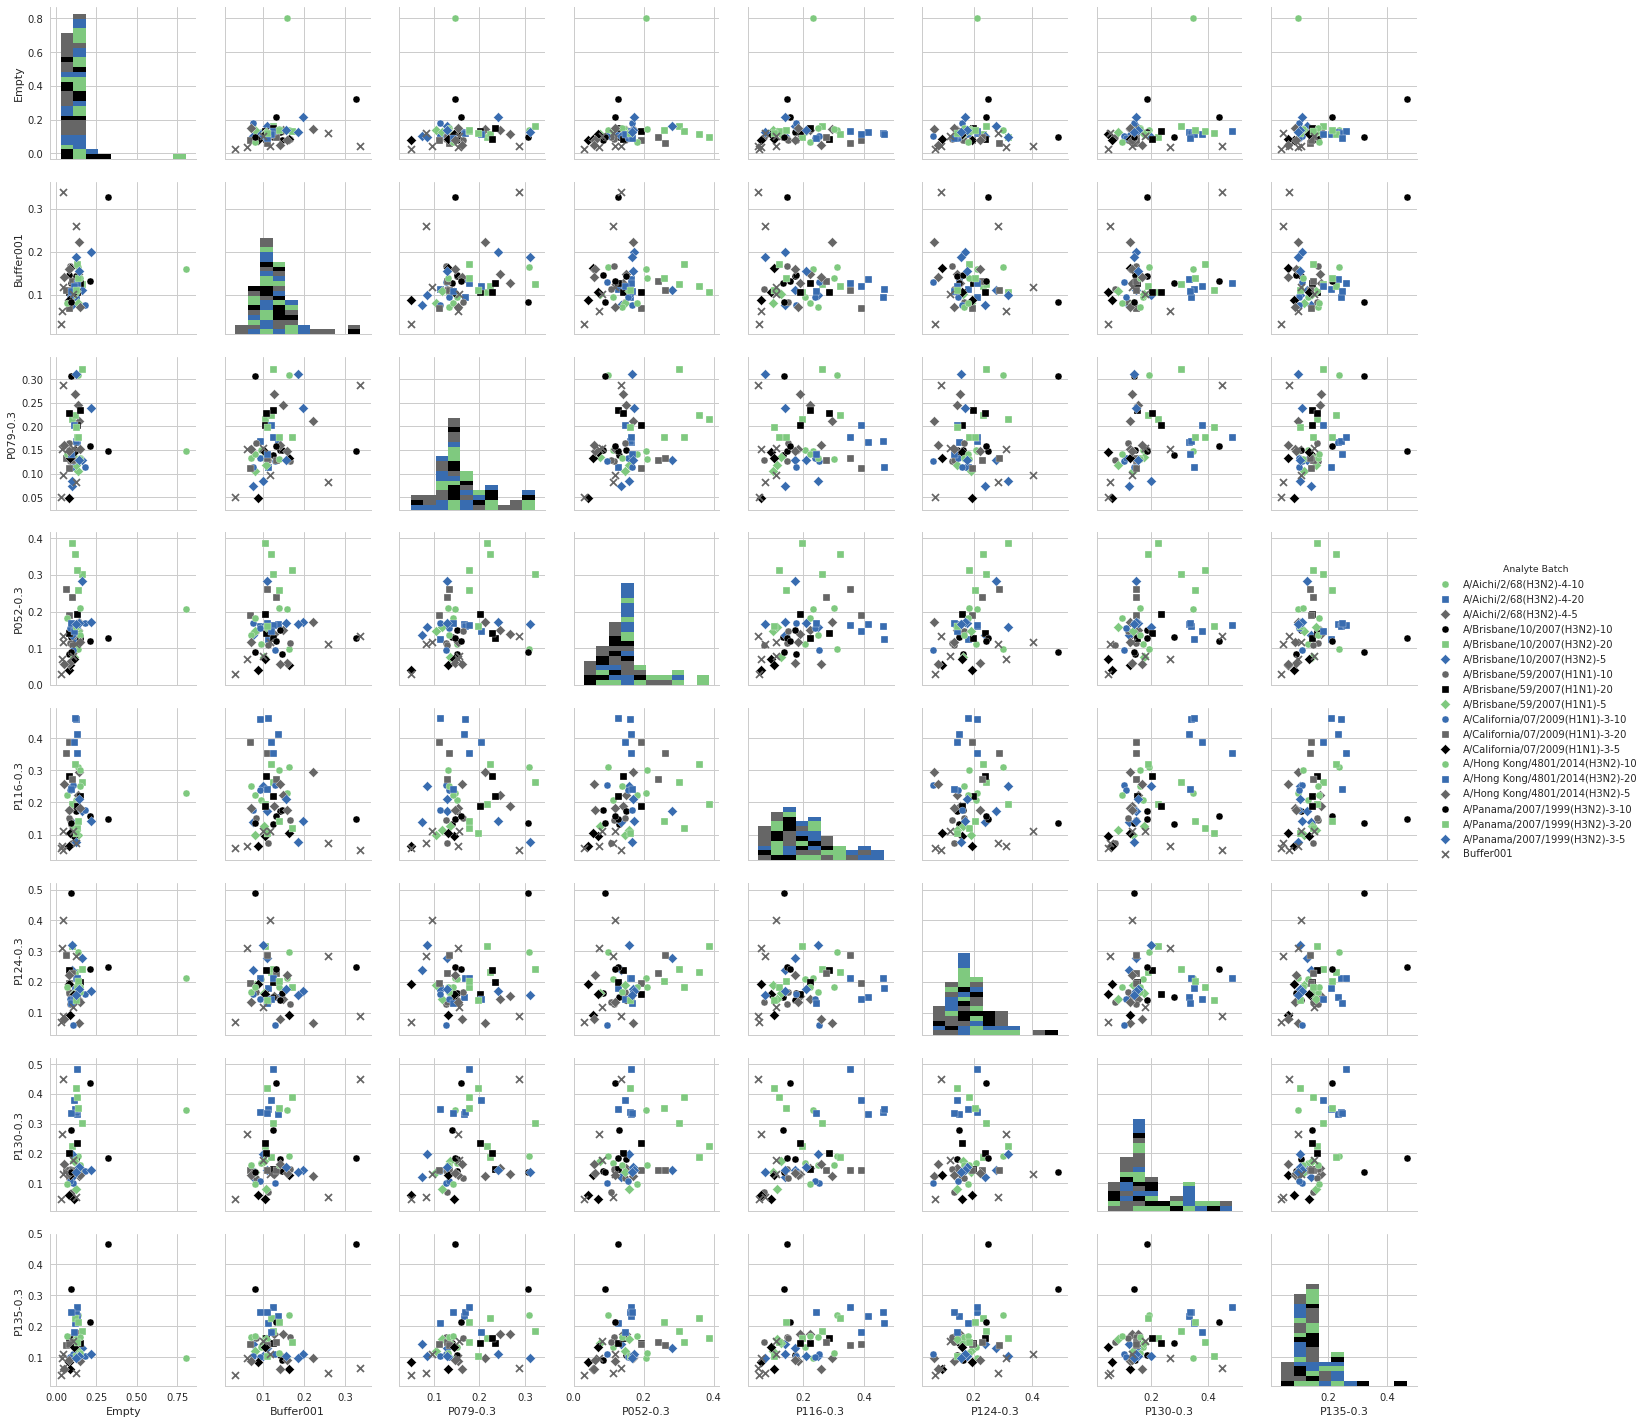

In [141]:
sns.pairplot(data=data_elisa.x.reset_index(),vars=["Empty","Buffer001","P079-0.3","P052-0.3","P116-0.3","P124-0.3","P130-0.3","P135-0.3"],hue="Analyte Batch",palette=color_list,markers= 6*["o","s","D"]+["x"])

In [125]:
d_analayte_x = data_elisa.spots_pd.pivot_table(values="Intensity",columns=["Ligand Batch","Analyte Batch Concentraion", "Replica"], index=["Analyte"])
d_new = d_analayte_x.transpose()

In [126]:

colors =  cmap(np.linspace(0,1,num=3))
color_list = []
for color in colors:
    #for i in range(3):
        color_list.append(color)
color_list += [np.array([0 ,0 , 0, 0]) ]

Correlation of Virsues 

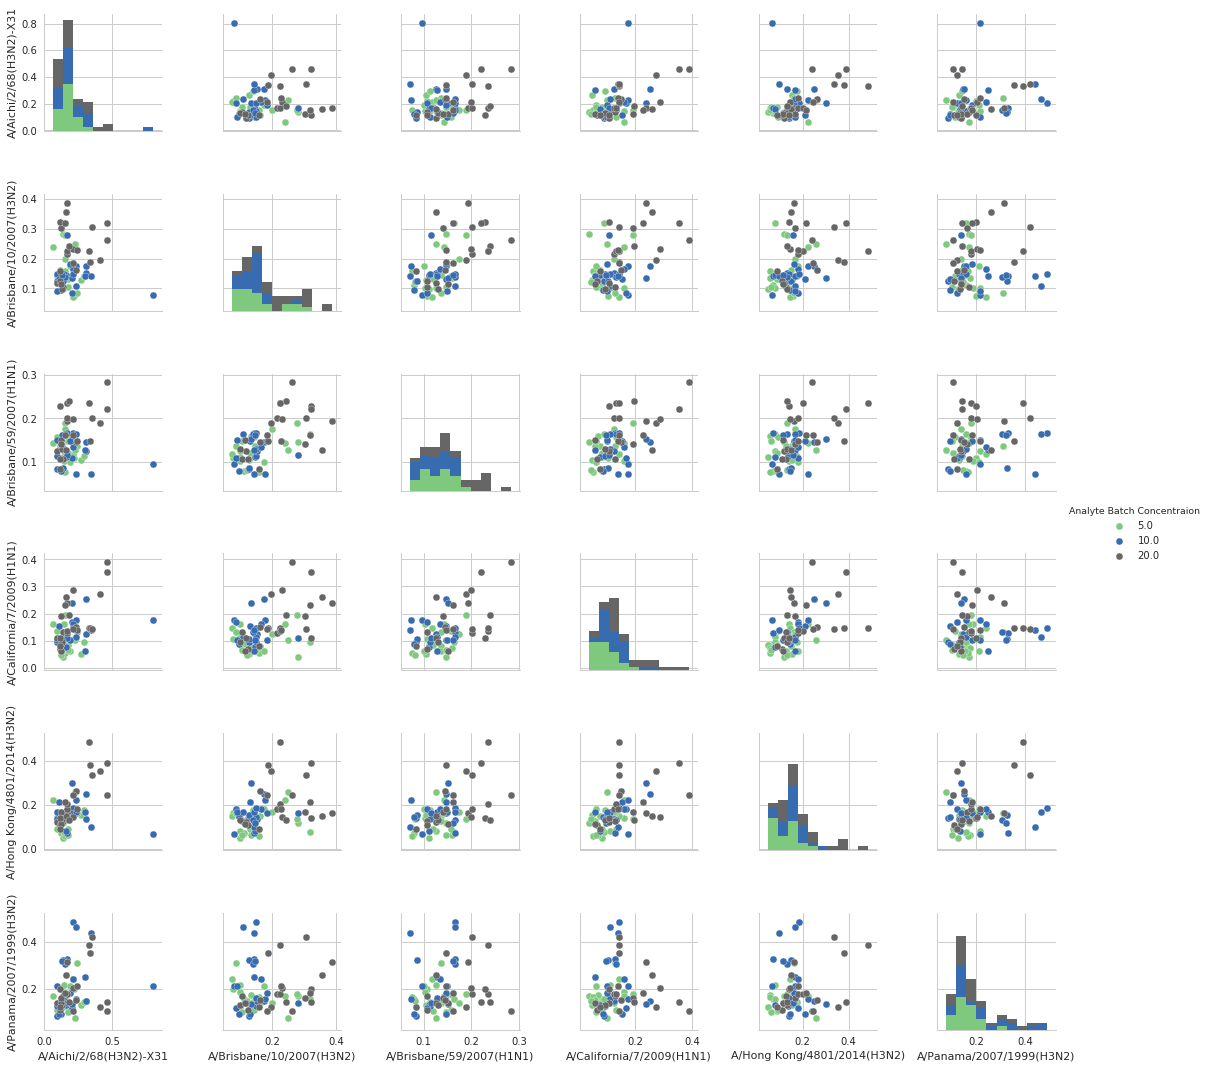

In [127]:
sns.pairplot(data=d_new.reset_index(),palette=color_list, hue="Analyte Batch Concentraion", vars=['A/Aichi/2/68(H3N2)-X31', 'A/Brisbane/10/2007(H3N2)', 'A/Brisbane/59/2007(H1N1)', 'A/California/7/2009(H1N1)', 'A/Hong Kong/4801/2014(H3N2)', 'A/Panama/2007/1999(H3N2)'])

## Heat/Cluster Map

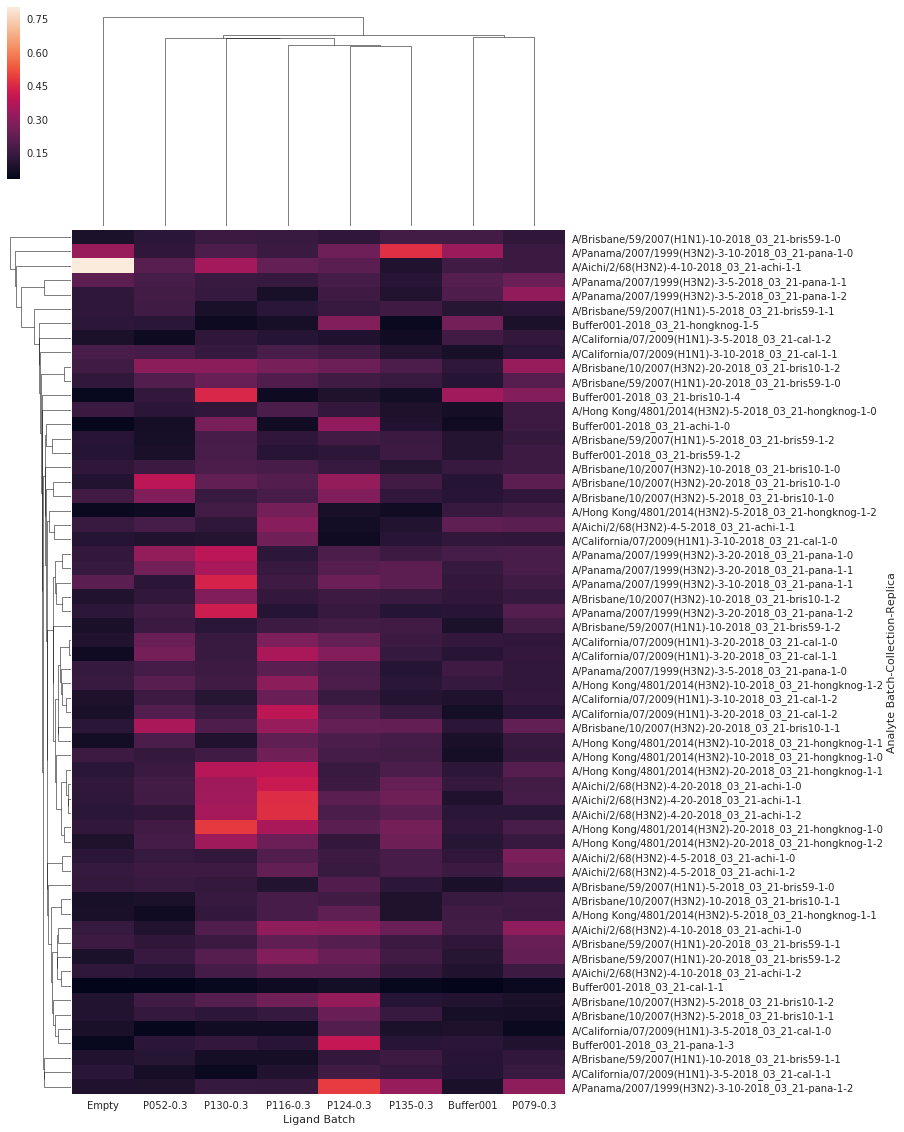

In [128]:
sns.clustermap(data_elisa.x, metric="correlation", method="single",figsize=(10,20))

## pca

In [129]:
#normalization
#frames = {}
#for cn, d in  data.spots_pd.groupby(["Collection","Ligand Batch"]):
#    d["Intensity"] = d["Intensity"]-d[d["Analyte Batch"] == "Buffer001"]["Intensity"].mean()
#    frames[cn]=d
#
#spots_pd_norm = pd.concat(frames)

In [130]:
#artificially increase data size
data_elisa_a = data_elisa.sample_on_collection(20)
# not used further

In [131]:
model_pca = data_elisa.x_pca_fit()
elisa_pca = model_pca.transform(data_elisa.x)

In [132]:
#sns.heatmap(model_pca.scalings_, center=True)

In [133]:
# creating colors for pca
le = preprocessing.LabelEncoder()
le.fit(data_elisa.y_names)
cs = le.transform(data_elisa.y_names)
colors =cs.astype(float) / cs.max()

In [134]:
trace1 = go.Scatter3d(
    x=elisa_pca[:,0],
    y=elisa_pca[:,1],
    z=elisa_pca[:,2],
    text = data_elisa.y_names+"<br>"+data_elisa.x.index.get_level_values("Collection"),
    mode='markers',
    hoverinfo='text',
    #hoverlabel=dict(bgcolor=list(colors)),
    marker=dict(
        size=7,
        color=colors,                # set color to an array/list of desired values
        colorscale='Jet',   # choose a colorscale
        opacity=0.99)
)

this = [trace1]
layout = go.Layout(
    #scene=dict(
    #    xaxis = dict(showspikes=False),
    #    yaxis = dict(showspikes=False),
    #    zaxis = dict(showspikes=False),

        

     #   )
    )
fig = go.Figure(data=this, layout=layout)
iplot(fig, filename='3d-scatter-colorscale')

In [135]:
complete = pd.DataFrame(columns=["Test", "Train"])
com = data_elisa.collections.unique().values
for i in range(1):
    complete.set_value(i,"Test",com)
    complete.set_value(i,"Train",com)



/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/home/janekg89/Envs/flutype_webapp3/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



In [136]:
#no cross-validation on different microwells possible possible without 
ana = a2.Analysis(data_elisa, train_test=complete)
ana.calculate_all()

*****Nearest Neighbors*****
*****Fit Models*****
*****Predict*****
*****Decision Tree*****
*****Fit Models*****
*****Predict*****
*****LogisticRegression*****
*****Fit Models*****
*****Predict*****


In [137]:
frame = ana.complete_information()
len_frame =int(len(frame)/3)
frame_NN = frame[:len_frame]
frame_DT = frame[len_frame:2*len_frame]
frame_LR = frame[2*len_frame:3*len_frame]

## Nearest Neighbors

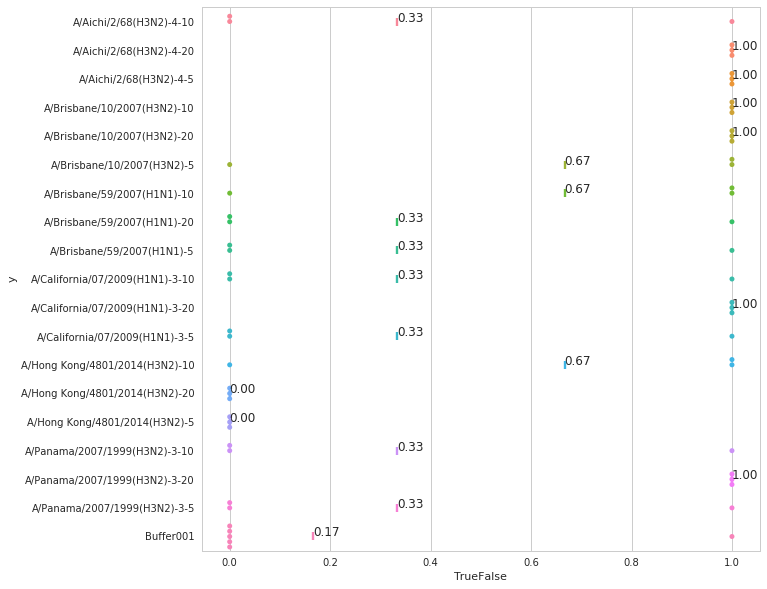

In [138]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_NN,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_NN,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()

## Decision Tree

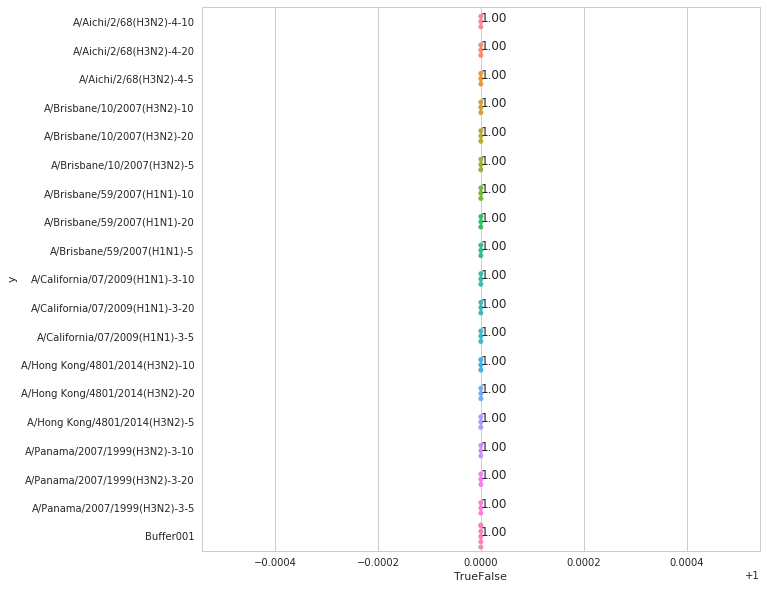

In [139]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_DT,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_DT,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()

## Logistic Regression

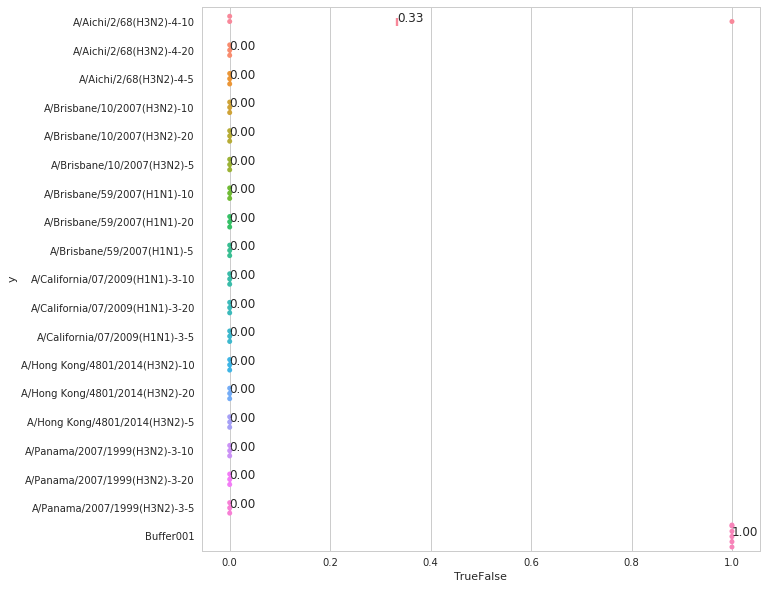

In [140]:
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(10,10))
#ax = sns.boxplot(data=frame_NN,y="y",x="TrueFalse",notch=True)
ax = sns.pointplot(data=frame_LR,y="y",x="TrueFalse",ci=None, join=False,hue="y", markers="|",)
for c in ax.collections:
    for of in c.get_offsets():
        ax.annotate("{:.2f}".format(of[0]), of)
        
ax = sns.swarmplot(data=frame_LR,y="y",x="TrueFalse")#, jitter=0.5)#, aspect=0.8)
ax.legend_.remove()
